# 1. Visualizing intermediate activations

### 1.1.1 Loading a saved model and printing a summary

In [1]:
from keras.models import load_model
from keras import optimizers

model = load_model('cats_and_dogs_small_2.h5')
model.summary() # As a reminder.

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 1.1.2 Preprocessing a single image

In [2]:
img_path = '../data/cats_and_dogs_small/test/cats/cat.1700.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


### 1.1.3 Displaying the test picture

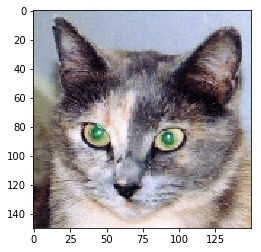

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

### 1.1.4 Instantiating a Mdoel from an input tensor and a list of output tensors

In [4]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### 1.1.5 Running our model in predict mode

In [5]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

### 1.1.6 First entry in the outputs: the output of the first layer of the original model

In [6]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


### 1.1.7 Plotting the 5th channel of the activation of the first layer of the original model

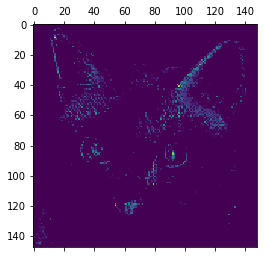

In [7]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

### 1.1.8 Plotting the 7th channel of the activation of the first layer of the original model

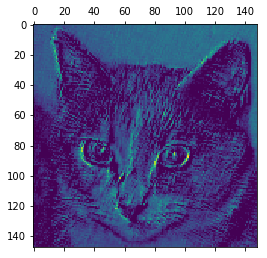

In [8]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()

### 1.1.9 Visualizing every channel in every intermediate activation

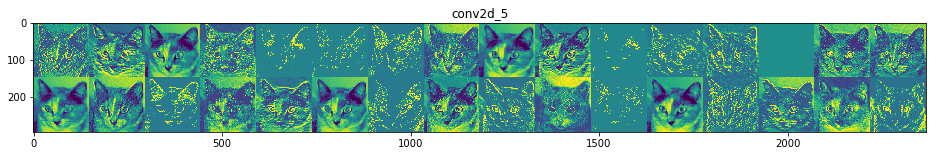

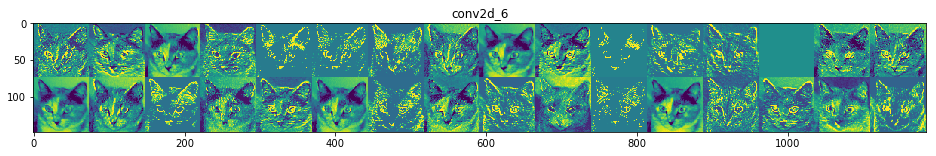

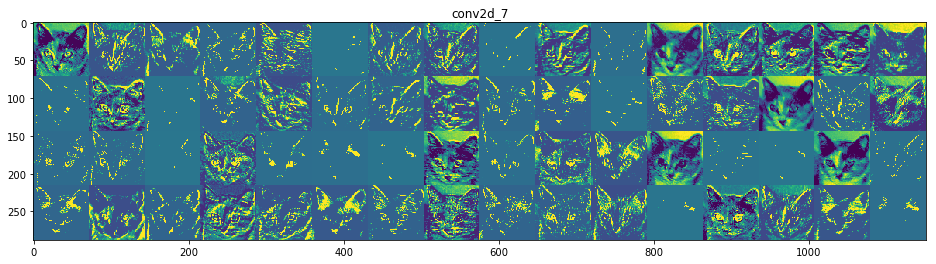

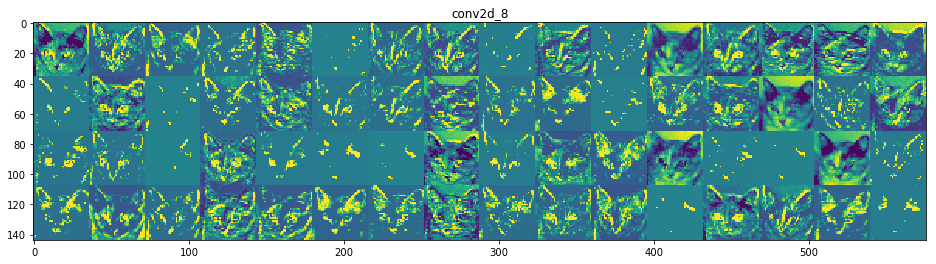

In [9]:
from keras import layers

# There are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    if isinstance(layer, layers.Conv2D):
        layer_names.append(layer.name)
        
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    
    # We will tile the activation channels in this matrix
    n_cols = int(n_features / images_per_row)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()